In [1]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
args = Namespace(
    seed=1234,
    train_size=0.75,
    test_size=0.25,
    num_iter=100,
)

In [3]:
dataset = datasets.load_diabetes(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, train_size=args.train_size, test_size=args.test_size, random_state=args.seed)
#X_train.columns #  display to pick one feature, in order to achieve clearer visualisation of the outcome
X_train = X_train['bmi'].values.reshape(-1,1) # use 'bmi' as the single independent variable for LR
X_test = X_test['bmi'].values.reshape(-1,1)

In [4]:
X_scaler = StandardScaler().fit(X_train) # standardize the train and test sets
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1)) # standardize y cause we need its mean and var to compute predicted values
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

In [5]:
lm = SGDRegressor(loss="squared_error", penalty="none", max_iter=args.num_iter)
lm.fit(X=standardized_X_train, y=standardized_y_train)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

Evaluation the predictions (via Mean squared erros)

In [6]:
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 3948.15, test_MSE: 3733.28


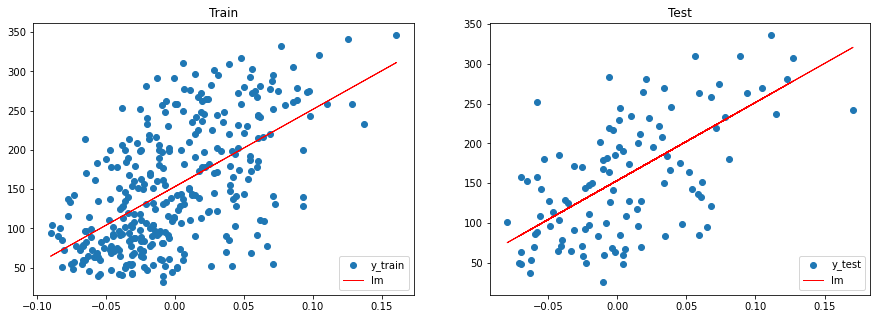

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1) # plot train data and LR result
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

plt.subplot(1, 2, 2) # plot test data and LR result
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

plt.show()